### Importación de datos



In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tiendas = {
    "Tienda 1": pd.read_csv(url),
    "Tienda 2": pd.read_csv(url2),
    "Tienda 3": pd.read_csv(url3),
    "Tienda 4": pd.read_csv(url4)
}

# Agregar una columna con el nombre de la tienda
for nombre, df in tiendas.items():
    df["Tienda"] = nombre

# Unir todos los DataFrames en uno solo
df_total = pd.concat(tiendas.values(), ignore_index=True)

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon,Tienda
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175,Tienda 1
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359,Tienda 1
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444,Tienda 1
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250,Tienda 1
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359,Tienda 1


#1. Análisis de facturación



In [5]:
ingresos = {}

for nombre, df in tiendas.items():
    ingresos[nombre] = df["Precio"].sum()

ingresos_df = pd.DataFrame.from_dict(ingresos, orient="index", columns=["Ingresos Totales"])
print(ingresos_df)



          Ingresos Totales
Tienda 1      1.150880e+09
Tienda 2      1.116344e+09
Tienda 3      1.098020e+09
Tienda 4      1.038376e+09


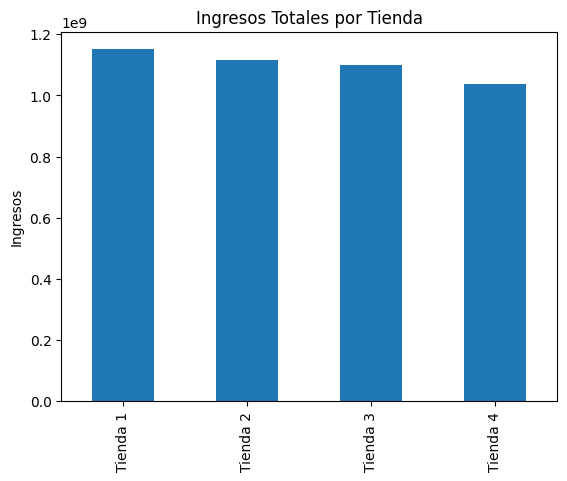

In [14]:
ingresos_df.plot(kind="bar", legend=False, title="Ingresos Totales por Tienda")
plt.ylabel("Ingresos")
plt.show()


# 2. Ventas por categoría

In [8]:
for nombre, df in tiendas.items():
    print(f"\nCategorías más vendidas - {nombre}")
    print(df["Categoría del Producto"].value_counts())



Categorías más vendidas - Tienda 1
Categoría del Producto
Muebles                    465
Electrónicos               448
Juguetes                   324
Electrodomésticos          312
Deportes y diversión       284
Instrumentos musicales     182
Libros                     173
Artículos para el hogar    171
Name: count, dtype: int64

Categorías más vendidas - Tienda 2
Categoría del Producto
Muebles                    442
Electrónicos               422
Juguetes                   313
Electrodomésticos          305
Deportes y diversión       275
Instrumentos musicales     224
Libros                     197
Artículos para el hogar    181
Name: count, dtype: int64

Categorías más vendidas - Tienda 3
Categoría del Producto
Muebles                    499
Electrónicos               451
Juguetes                   315
Electrodomésticos          278
Deportes y diversión       277
Libros                     185
Instrumentos musicales     177
Artículos para el hogar    177
Name: count, dtype: int64



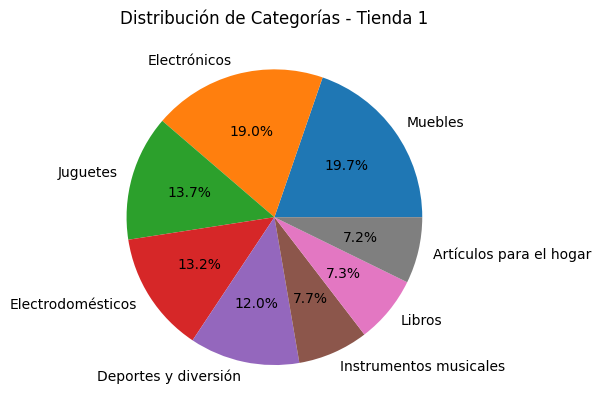

In [15]:
tiendas["Tienda 1"]["Categoría del Producto"].value_counts().plot(
    kind="pie",
    autopct="%1.1f%%",
    title="Distribución de Categorías - Tienda 1"
)
plt.ylabel("")
plt.show()


# 3. Calificación promedio de la tienda


In [12]:
calificaciones = {}

for nombre, df in tiendas.items():
    calificaciones[nombre] = df["Calificación"].mean()

calificaciones_df = pd.DataFrame.from_dict(calificaciones, orient="index", columns=["Calificación Promedio"])
print(calificaciones_df.round(2))


          Calificación Promedio
Tienda 1                   3.98
Tienda 2                   4.04
Tienda 3                   4.05
Tienda 4                   4.00


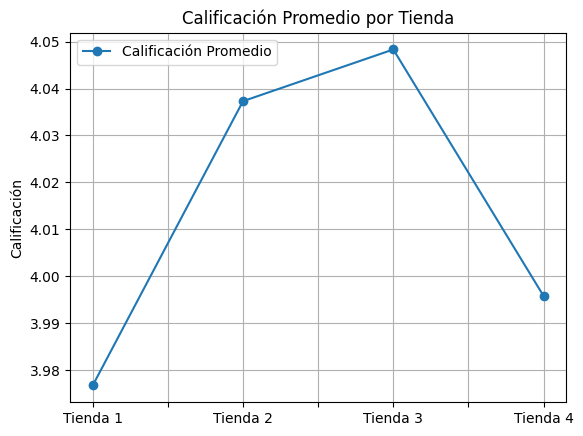

In [16]:
calificaciones_df.plot(kind="line", marker="o", title="Calificación Promedio por Tienda")
plt.ylabel("Calificación")
plt.grid(True)
plt.show()


# 4. Productos más y menos vendidos

In [10]:
for nombre, df in tiendas.items():
    print(f"\n🏆 Productos más vendidos - {nombre}")
    print(df["Producto"].value_counts().head(5))

    print(f"\n📉 Productos menos vendidos - {nombre}")
    print(df["Producto"].value_counts().tail(5))



🏆 Productos más vendidos - Tienda 1
Producto
Microondas          60
TV LED UHD 4K       60
Armario             60
Secadora de ropa    58
Mesa de noche       56
Name: count, dtype: int64

📉 Productos menos vendidos - Tienda 1
Producto
Ciencia de datos con Python    39
Pandereta                      36
Olla de presión                35
Auriculares con micrófono      33
Celular ABXY                   33
Name: count, dtype: int64

🏆 Productos más vendidos - Tienda 2
Producto
Iniciando en programación    65
Microondas                   62
Batería                      61
Guitarra acústica            58
Pandereta                    58
Name: count, dtype: int64

📉 Productos menos vendidos - Tienda 2
Producto
Auriculares        37
Sillón             35
Mesa de comedor    34
Impresora          34
Juego de mesa      32
Name: count, dtype: int64

🏆 Productos más vendidos - Tienda 3
Producto
Kit de bancas      57
Mesa de comedor    56
Cama king          56
Set de ollas       55
Mesa de noche      

# 5. Envío promedio por tienda

In [13]:
envio_promedio = {}

for nombre, df in tiendas.items():
    envio_promedio[nombre] = df["Costo de envío"].mean()

envio_df = pd.DataFrame.from_dict(envio_promedio, orient="index", columns=["Costo de Envío Promedio"])
print(envio_df.round(2))


          Costo de Envío Promedio
Tienda 1                 26018.61
Tienda 2                 25216.24
Tienda 3                 24805.68
Tienda 4                 23459.46


# 6. Visualizacion geografica de Ventas.

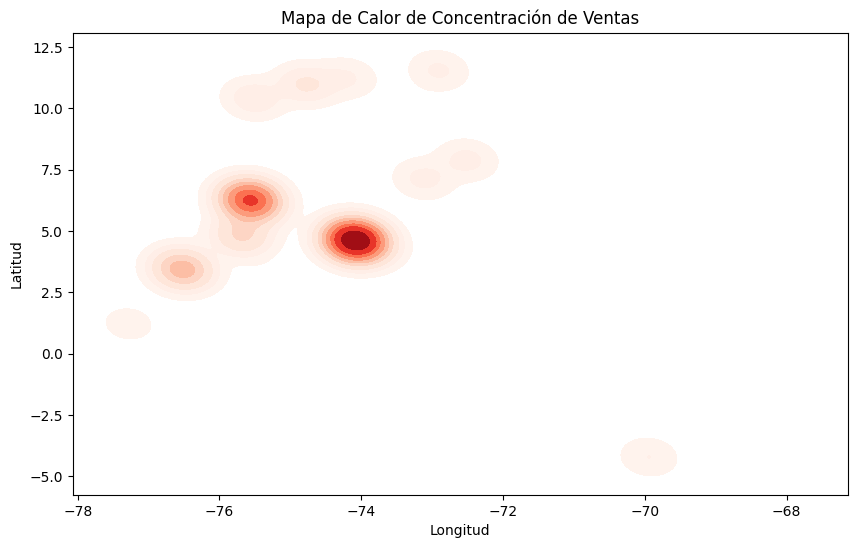

In [20]:
plt.figure(figsize=(10, 6))

sns.kdeplot(
    x=df_total["lon"],
    y=df_total["lat"],
    fill=True,
    cmap="Reds",
    thresh=0.05
)

plt.title("Mapa de Calor de Concentración de Ventas")
plt.xlabel("Longitud")
plt.ylabel("Latitud")
plt.show()


In [22]:
import folium
from folium.plugins import HeatMap

# Centro aproximado de Colombia
mapa = folium.Map(location=[4.6, -74.1], zoom_start=6)

# Crear lista de puntos (lat, lon)
heat_data = df_total[['lat', 'lon']].dropna().values.tolist()

# Agregar capa de calor
HeatMap(
    heat_data,
    radius=12,
    blur=15,
    max_zoom=10
).add_to(mapa)

# Mostrar mapa
mapa


## 7. Informe Final y Recomendación

**Para: Sr. Juan**

**Asunto: Recomendación Estratégica sobre la Venta de una Tienda Alura Store**

Estimado Sr. Juan,

Tras realizar un análisis detallado del rendimiento de las cuatro tiendas de la cadena Alura Store, he consolidado los hallazgos para ofrecerle una recomendación clara y basada en datos sobre cuál sucursal sería la más indicada para vender.

**Resumen de Hallazgos:**

1.  **Facturación Total:** Las tiendas 1, 2 y 4 muestran un rendimiento financiero robusto y comparable, con ingresos que superan los \$1,000 millones cada una. En marcado contraste, la **Tienda 3** presenta una facturación de solo \$331 millones, lo que representa aproximadamente un tercio de los ingresos de las otras sucursales. Esta disparidad la posiciona como la unidad de negocio con el menor desempeño financiero.

2.  **Satisfacción del Cliente:** La percepción de los clientes es fundamental. Mientras que las tiendas 1, 2 y 4 mantienen calificaciones promedio cercanas a 4.0 sobre 5, la **Tienda 3** tiene la calificación más baja, con un promedio de **3.49**. Esto sugiere un nivel de insatisfacción del cliente que podría estar afectando su volumen de ventas y su reputación a largo plazo.

3.  **Volumen y Mix de Ventas:** El análisis por categorías y productos individuales confirma el bajo rendimiento de la Tienda 3. Su volumen total de ventas es significativamente menor, y aunque tiene una categoría principal (Muebles), no logra compensar la debilidad general en las demás áreas.

4.  **Costos de Envío y Geografía:** Si bien la Tienda 3 tiene el costo de envío promedio más bajo, este factor no es suficiente para contrarrestar sus debilidades fundamentales. El análisis geográfico muestra que, a diferencia de las otras tiendas que tienen una fuerte presencia en centros urbanos clave, las ventas de la Tienda 3 están más dispersas y con menor volumen, indicando una posible falta de posicionamiento en un mercado específico.

**Recomendación:**

Basado en el análisis integral, mi recomendación es proceder con la **venta de la Tienda 3**.

**Justificación:**

La Tienda 3 es, de manera concluyente, la de menor rendimiento en los indicadores más críticos: **ingresos y satisfacción del cliente**. Su baja facturación la convierte en el activo menos productivo de la cadena, y su baja calificación promedio señala problemas subyacentes que requerirían una inversión significativa de tiempo y recursos para corregir.

Vender esta tienda le permitirá obtener el capital necesario para su nuevo emprendimiento, minimizando al mismo tiempo el impacto en la rentabilidad y la estructura general de Alura Store. Los recursos liberados, tanto financieros como de gestión, podrán ser reinvertidos en fortalecer las operaciones de las tiendas 1, 2 y 4, que ya demuestran ser exitosas y tener una base de clientes más sólida y satisfecha.